In [19]:
import os
import glob
import sklearn
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
PATH = "database/Laboratory/"

In [3]:
directories = glob.glob(f"{PATH}*.csv")

In [4]:
directories

['database/Laboratory\\L10AM.csv',
 'database/Laboratory\\L13+.csv',
 'database/Laboratory\\LAB10.csv',
 'database/Laboratory\\LAB11.csv',
 'database/Laboratory\\LAB13.csv',
 'database/Laboratory\\LAB16.csv',
 'database/Laboratory\\SSCARD_A.csv']

In [5]:
full_dfs = {}

In [6]:
for direc in directories:
    name = direc.split("\\")[1].split(".")[0]
    full_dfs[name] = pd.read_csv(direc, index_col=False)

In [7]:
L10AM = full_dfs["L10AM"]
L13 = full_dfs["L13+"]
LAB10 = full_dfs["LAB10"]
LAB11 = full_dfs["LAB11"]
LAB13 = full_dfs["LAB13"]
LAB16 = full_dfs["LAB16"]
SSCARD_A = full_dfs["SSCARD_A"]

In [8]:
def merge_effectively(not_merged, df):
    max_entry = -1
    max_candidate = None
    print(f"Progressing {not_merged}")
    name = None
    for cand in not_merged:
        tmp_df_i = full_dfs[cand]
        tmp_df = pd.merge(df, tmp_df_i, on="SEQN", how="inner", suffixes=["", "**"])
        if(len(tmp_df) > max_entry):
            max_entry = len(tmp_df)
            max_candidate = tmp_df
            name = cand
    not_merged.remove(name)
    return max_candidate

In [9]:
def get_largest_df():
    max_entry = -1
    max_df = None
    for n in full_dfs.keys():
        tmp_df = full_dfs[n]
        if(max_entry < len(tmp_df)):
            max_enrty = len(tmp_df)
            max_df = n
    return max_df

In [10]:
def merge_dataframes(not_merged):
    max_df = get_largest_df()
    merged_df = full_dfs[max_df]
    not_merged.remove(max_df)
    while len(not_merged) > 0:
        merged_df = merge_effectively(not_merged, merged_df)
    return merged_df

In [126]:
not_merged = list(full_dfs.keys())
merged_df = merge_dataframes(not_merged)

Progressing ['L10AM', 'L13+', 'LAB10', 'LAB11', 'LAB13', 'LAB16']
Progressing ['L10AM', 'L13+', 'LAB10', 'LAB11', 'LAB16']
Progressing ['L10AM', 'L13+', 'LAB10', 'LAB11']
Progressing ['L10AM', 'L13+', 'LAB11']
Progressing ['L13+', 'LAB11']
Progressing ['LAB11']


In [127]:
deleted_columns = []
for i in merged_df.columns:
    if i[-2]+i[-1] == "**":
        deleted_columns.append(i)
merged_df.drop(columns=deleted_columns, inplace=True)

In [128]:
merged_df.drop(columns=["year_y", "WTSAF4YR", "SEQN", "year"], inplace=True)

In [129]:
merged_df.columns

Index(['WTSSCB2Y', 'SSB2M', 'SSB2ML', 'SSCYST', 'SSCYSTL', 'SSGALB', 'SSGALBL',
       'SSALB', 'SSALBL', 'SSGALBP', 'SSPRIS', 'LBXTC', 'LBDTCSI', 'LBDHDL',
       'LBDHDLSI', 'URXUMA', 'URXUMASI', 'URXUCR', 'URXUCRSI', 'LBXGH',
       'WTSAF2YR', 'LBXGLU', 'LBXGLUSI', 'LBXCPSI', 'LBXIN', 'LBXINSI',
       'LBDINSI', 'LBXTR', 'LBDTRSI', 'LBDLDL', 'LBDLDLSI', 'LBXCRP',
       'LBXBAP'],
      dtype='object')

In [130]:
df = merged_df

In [131]:
for i in df.columns:
    df[i] = df[i]/np.max(df[i])
df = df.dropna(axis=1)

In [132]:
for i in df.columns:
    mean = np.mean(df[i])
    x = 0.5/mean
    df[i] = df[i]*x

<ipython-input-132-7d5c67a0a9f3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i]*x


In [133]:
df

WTSSCB2Y     SSB2M  SSB2ML    SSCYST  SSCYSTL    SSGALB     SSALB  \
0      0.139466  0.538304     0.0  0.544217      0.0  0.491687  0.490323   
1      0.139466  0.538304     0.0  0.544217      0.0  0.491687  0.490323   
2      0.139466  0.538304     0.0  0.544217      0.0  0.491687  0.490323   
3      0.426056  0.397029     0.0  0.456708      0.0  0.490784  0.537404   
4      0.426056  0.397029     0.0  0.456708      0.0  0.490784  0.537404   
...         ...       ...     ...       ...      ...       ...       ...   
11875  0.579033  0.465231     0.0  0.449043      0.0  0.488078  0.500299   
11876  0.579033  0.465231     0.0  0.449043      0.0  0.488078  0.500299   
11877  0.321382  0.474974     0.0  0.567212      0.0  0.427632  0.524737   
11878  0.321382  0.474974     0.0  0.567212      0.0  0.427632  0.524737   
11879  0.321382  0.474974     0.0  0.567212      0.0  0.427632  0.524737   

        SSGALBP    SSPRIS     LBXTC  ...  URXUCRSI  WTSAF2YR    LBXGLU  \
0      0.498923  0.502156  0.554726  ...  0.517382  0.137574  0.405139   
1      0.498923  0.502156  0.554726  ...  0.517382  0.137574  0.405139   
2      0.498923  0.502156  0.554726  ...  0.517382  0.137574  0.405139   
3      0.463714  0.502156  0.719854  ...  0.613730  0.409598  0.485756   
4      0.463714  0.502156  0.719854  ...  0.613730  0.409598  0.485756   
...         ...       ...       ...  ...       ...       ...       ...   
11875  0.488209  0.502156  0.544405  ...  0.146278  0.582563  0.554611   
11876  0.488209  0.502156  0.544405  ...  0.146278  0.582563  0.554611   
11877  0.425041  0.502156  0.727594  ...  0.917023  0.386023  0.511929   
11878  0.425041  0.502156  0.727594  ...  0.917023  0.386023  0.511929   
11879  0.425041  0.502156  0.727594  ...  0.917023  0.386023  0.511929   

       LBXGLUSI     LBXIN     LBXTR   LBDTRSI    LBDLDL  LBDLDLSI    LBXCRP  
0      0.413109  0.187755  0.502381  0.504077  0.591122  0.594241  0.396922  
1      0.413109  0.187755  0.502381  0.504077  0.591122  0.594241  0.396922  
2      0.413109  0.187755  0.502381  0.504077  0.591122  0.594241  0.396922  
3      0.493490  0.563265  1.361923  1.362746  0.731700  0.732672  0.088205  
4      0.493490  0.563265  1.361923  1.362746  0.731700  0.732672  0.088205  
...         ...       ...       ...       ...       ...       ...       ...  
11875  0.551286  1.667925  0.867392  0.867360  0.536114  0.537011  0.132307  
11876  0.551286  1.667925  0.867392  0.867360  0.536114  0.537011  0.132307  
11877  0.508873  0.642494  1.204929  1.204918  0.740431  0.742125  0.176410  
11878  0.508873  0.642494  1.204929  1.204918  0.740431  0.742125  0.176410  
11879  0.508873  0.642494  1.204929  1.204918  0.740431  0.742125  0.176410  

[11880 rows x 26 columns]

<AxesSubplot:>

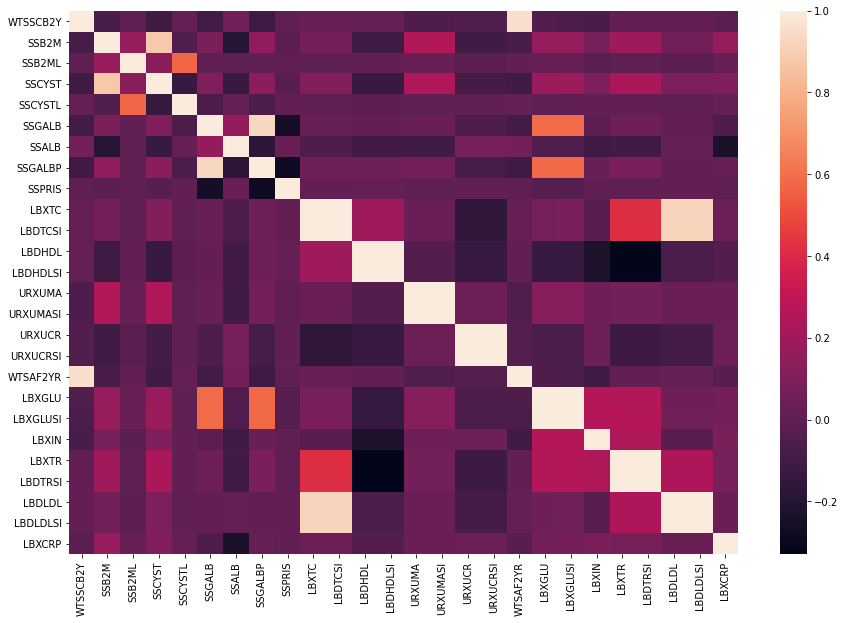

In [138]:
plt.figure(figsize=(15, 10))
corr = df.corr()
sns.heatmap(corr)

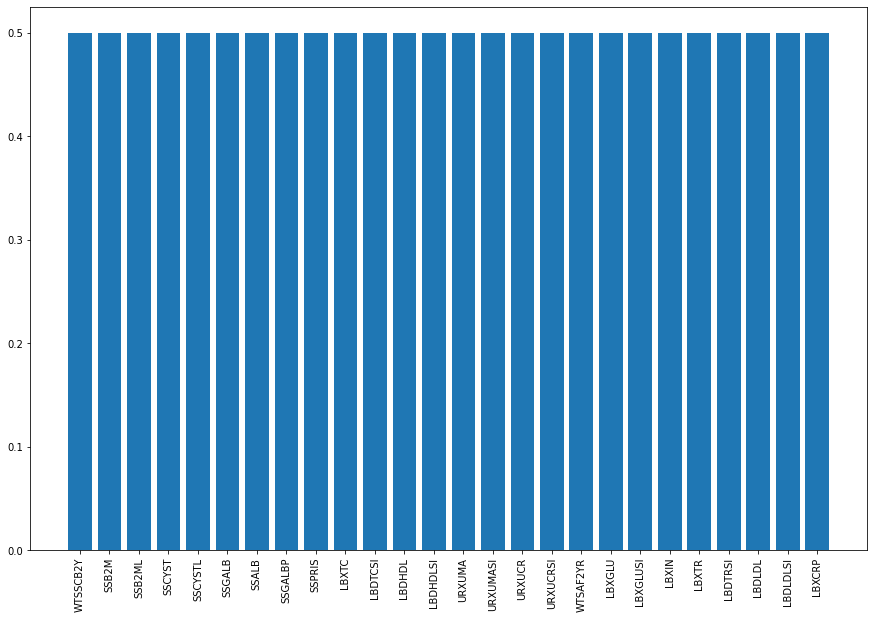

In [135]:
means = [np.mean(df[i]) for i in df.columns]
plt.figure(figsize=(15,10))
plt.bar(df.columns, height=means)
plt.xticks(rotation=90)
plt.show()